# IMDB-Movie-Rating-Prediction

In [294]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_auc_score,confusion_matrix,precision_score, make_scorer




In [295]:
!pip install imblearn


You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [296]:
imdb_df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv")

In [297]:
imdb_df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [298]:
imdb_df.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [299]:
imdb_df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [300]:
imdb_df.tail()

,star_rating,title,content_rating,genre,duration,actors_list
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."
978,7.4,Wall Street,R,Crime,126,"[u'Charlie Sheen', u'Michael Douglas', u'Tamar..."


In [301]:
print(imdb_df.genre.unique())
print(imdb_df.star_rating.unique())
print(imdb_df.content_rating.unique())
print(imdb_df.duration.unique())




['Crime' 'Action' 'Drama' 'Western' 'Adventure' 'Biography' 'Comedy'
 'Animation' 'Mystery' 'Horror' 'Film-Noir' 'Sci-Fi' 'History' 'Thriller'
 'Family' 'Fantasy']
[9.3 9.2 9.1 9.  8.9 8.8 8.7 8.6 8.5 8.4 8.3 8.2 8.1 8.  7.9 7.8 7.7 7.6
 7.5 7.4]
['R' 'PG-13' 'NOT RATED' 'PG' 'UNRATED' 'APPROVED' 'PASSED' 'G' 'X' nan
 'TV-MA' 'GP' 'NC-17']
[142 175 200 152 154  96 161 201 195 139 178 148 124 179 169 133 207 146
 121 136 130 106 127 116 118 110  87 125 112 102 107 119 115 109 189 150
 165 155 137 113  95 151 153  89 117  88 170  99  98 156 122 149 134 157
 123 128 120 229 103 177 129 216  93  68 108 181 138 160 126  91 143 132
 183 140  81 131 172 162  86 186 224 180 105 238 182  92 100 135  94  83
 163 167 188 111 101 212 114 158 191 147 174  85 184  67 141 104  80  84
 145  76  82 197  66 144  70  90  97  64  75 193 159 220 242  78 166  79
 187 194 202 168 164  69 205]


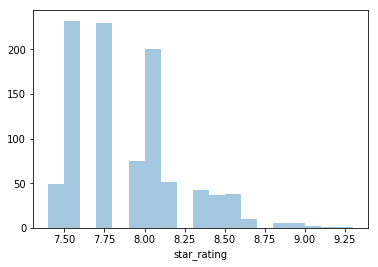

In [302]:
sns.distplot(imdb_df['star_rating'], kde=False)


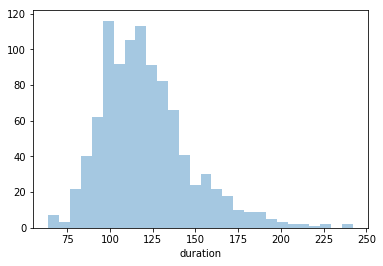

In [303]:
sns.distplot(imdb_df['duration'], kde=False)

# Missing Values

In [304]:
imdb_df.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [305]:
imdb_df.content_rating.unique()

array(['R', 'PG-13', 'NOT RATED', 'PG', 'UNRATED', 'APPROVED', 'PASSED',
       'G', 'X', nan, 'TV-MA', 'GP', 'NC-17'], dtype=object)

In [306]:
imdb_df['content_rating'].replace(np.nan,'NOT RATED',inplace=True)

In [307]:
imdb_df.content_rating.isnull().sum()

0

In [308]:
imdb_df.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [309]:
imdb_df.corr()

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


# Converting categorical features to numerical

# One Hot Encoding

In [310]:
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df
    
    

In [311]:
dummyEncode(imdb_df)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,866,8,5,142,875
1,9.2,756,8,5,175,621
2,9.1,757,8,5,200,23
3,9.0,730,7,0,152,173
4,8.9,560,8,5,154,499
5,8.9,1,4,6,96,377
6,8.9,760,4,15,161,191
7,8.9,812,7,1,201,280
8,8.9,602,8,3,195,596
9,8.9,260,8,6,139,101


In [312]:
imdb_df.describe()

,star_rating,title,content_rating,genre,duration,actors_list
count,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,7.889785,487.383044,6.680286,4.271706,120.979571,483.440245
std,0.336069,281.639789,2.300291,3.020673,26.218010,279.525557
min,7.400000,0.000000,0.000000,0.000000,64.000000,0.000000
25%,7.600000,243.500000,6.000000,2.000000,102.000000,239.500000
50%,7.800000,487.000000,8.000000,4.000000,117.000000,483.000000
75%,8.100000,731.500000,8.000000,6.000000,134.000000,724.500000
max,9.300000,974.000000,11.000000,15.000000,242.000000,968.000000


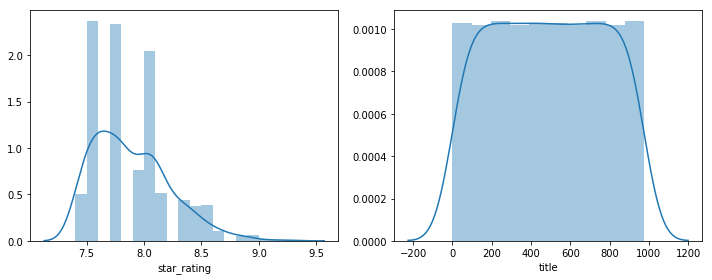

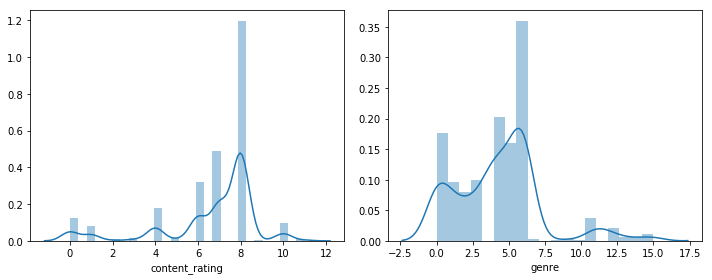

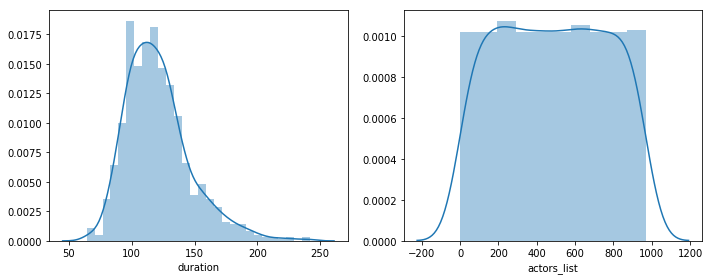

In [313]:
num_cols = imdb_df.columns
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(imdb_df[num_cols[i]], kde=True)
        plt.subplot(122)            
        sns.distplot(imdb_df[num_cols[i+1]], kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(imdb_df[num_cols[i]], kde=False)

# Correlation

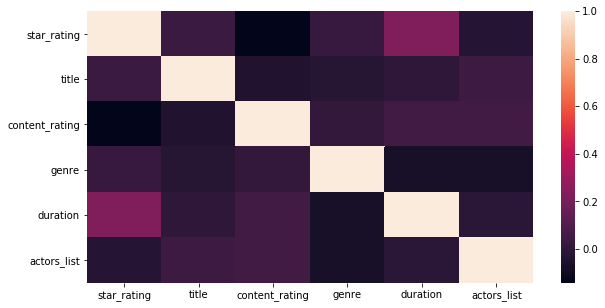

In [314]:
plt.figure(figsize=(10,5))
sns.heatmap(imdb_df.corr())
plt.show()


In [315]:
imdb_df.star_rating

0      9.3
1      9.2
2      9.1
3      9.0
4      8.9
5      8.9
6      8.9
7      8.9
8      8.9
9      8.9
10     8.8
11     8.8
12     8.8
13     8.8
14     8.8
15     8.7
16     8.7
17     8.7
18     8.7
19     8.7
20     8.7
21     8.7
22     8.7
23     8.7
24     8.7
25     8.6
26     8.6
27     8.6
28     8.6
29     8.6
      ... 
949    7.4
950    7.4
951    7.4
952    7.4
953    7.4
954    7.4
955    7.4
956    7.4
957    7.4
958    7.4
959    7.4
960    7.4
961    7.4
962    7.4
963    7.4
964    7.4
965    7.4
966    7.4
967    7.4
968    7.4
969    7.4
970    7.4
971    7.4
972    7.4
973    7.4
974    7.4
975    7.4
976    7.4
977    7.4
978    7.4
Name: star_rating, Length: 979, dtype: float64

# Continuous to categorical  

In [316]:
bin = [0,6,8,10]
imdb_df.star_rating = pd.cut(imdb_df.star_rating,bin)


In [317]:
imdb_df.star_rating

0      (8, 10]
1      (8, 10]
2      (8, 10]
3      (8, 10]
4      (8, 10]
5      (8, 10]
6      (8, 10]
7      (8, 10]
8      (8, 10]
9      (8, 10]
10     (8, 10]
11     (8, 10]
12     (8, 10]
13     (8, 10]
14     (8, 10]
15     (8, 10]
16     (8, 10]
17     (8, 10]
18     (8, 10]
19     (8, 10]
20     (8, 10]
21     (8, 10]
22     (8, 10]
23     (8, 10]
24     (8, 10]
25     (8, 10]
26     (8, 10]
27     (8, 10]
28     (8, 10]
29     (8, 10]
        ...   
949     (6, 8]
950     (6, 8]
951     (6, 8]
952     (6, 8]
953     (6, 8]
954     (6, 8]
955     (6, 8]
956     (6, 8]
957     (6, 8]
958     (6, 8]
959     (6, 8]
960     (6, 8]
961     (6, 8]
962     (6, 8]
963     (6, 8]
964     (6, 8]
965     (6, 8]
966     (6, 8]
967     (6, 8]
968     (6, 8]
969     (6, 8]
970     (6, 8]
971     (6, 8]
972     (6, 8]
973     (6, 8]
974     (6, 8]
975     (6, 8]
976     (6, 8]
977     (6, 8]
978     (6, 8]
Name: star_rating, Length: 979, dtype: category
Categories (3, interval[int64]): [(0,

In [318]:
imdb_df.star_rating.isnull().sum()

0

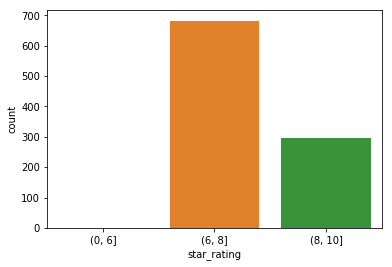

In [319]:
sns.countplot(imdb_df.star_rating)

# RandomForest Classifier

In [320]:
##extract labels from feature matrix 
y= np.asarray(imdb_df['star_rating'], dtype="|S6")
X=imdb_df.drop(['star_rating'],axis=1)

#split dataset into train and test
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=42)

#OverSampling
ros = RandomOverSampler(random_state=9)
X_oversample, y_oversample =  ros.fit_sample(X_train, y_train)

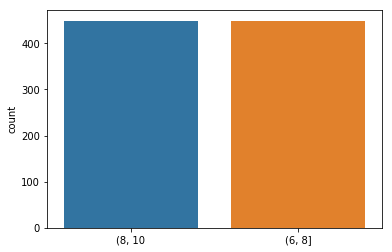

In [321]:
sns.countplot(y_oversample)

In [322]:
y_oversample

array(['(8, 10', '(6, 8]', '(6, 8]', '(6, 8]', '(8, 10', '(6, 8]',
       '(8, 10', '(8, 10', '(6, 8]', '(8, 10', '(8, 10', '(8, 10',
       '(6, 8]', '(6, 8]', '(6, 8]', '(8, 10', '(6, 8]', '(8, 10',
       '(6, 8]', '(8, 10', '(8, 10', '(6, 8]', '(8, 10', '(6, 8]',
       '(6, 8]', '(8, 10', '(6, 8]', '(8, 10', '(8, 10', '(8, 10',
       '(6, 8]', '(6, 8]', '(8, 10', '(6, 8]', '(6, 8]', '(8, 10',
       '(8, 10', '(6, 8]', '(8, 10', '(8, 10', '(6, 8]', '(6, 8]',
       '(8, 10', '(6, 8]', '(6, 8]', '(8, 10', '(8, 10', '(6, 8]',
       '(8, 10', '(6, 8]', '(8, 10', '(6, 8]', '(6, 8]', '(6, 8]',
       '(6, 8]', '(8, 10', '(6, 8]', '(6, 8]', '(6, 8]', '(6, 8]',
       '(6, 8]', '(6, 8]', '(8, 10', '(6, 8]', '(6, 8]', '(6, 8]',
       '(6, 8]', '(8, 10', '(6, 8]', '(6, 8]', '(6, 8]', '(6, 8]',
       '(8, 10', '(6, 8]', '(6, 8]', '(6, 8]', '(6, 8]', '(6, 8]',
       '(8, 10', '(8, 10', '(6, 8]', '(8, 10', '(8, 10', '(6, 8]',
       '(6, 8]', '(6, 8]', '(8, 10', '(8, 10', '(8, 10', '(6, 

In [330]:
param_grid = {
    'n_estimators': [2, 5,10,12,14,15],
    'max_depth': [2,4,6,8,16],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 3, 5, 10, 15,20,25,30,35,40,45],
    'criterion' :['gini', 'entropy']
    
}

In [331]:
classifier_RandomForest = RandomForestClassifier(random_state=9)

In [332]:
CV_rfc = GridSearchCV(estimator=classifier_RandomForest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_oversample, y_oversample)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=9, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [2, 5, 10, 12, 14, 15], 'min_samples_split': [2, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 16], 'min_samples_leaf': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [333]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 12}

In [340]:
rfc1=RandomForestClassifier(random_state=9, n_estimators=12, criterion='entropy', max_depth=16, min_samples_leaf=3, min_samples_split=2)

In [341]:
rfc1.fit(X_oversample, y_oversample)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=1,
            oob_score=False, random_state=9, verbose=0, warm_start=False)

In [343]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,rfc1.predict(X_test)))

('Accuracy for Random Forest on CV data: ', 0.6574074074074074)


In [347]:
print(confusion_matrix(y_test, rfc1.predict(X_test)))

[[175  58]
 [ 53  38]]


In [348]:
print("f1_score", f1_score(y_test, rfc1.predict(X_test)))
print(precision_score(y_test, rfc1.predict(X_test)))
print(recall_score(y_test, rfc1.predict(X_test)))
print(roc_auc_score(y_test, rfc1.predict(X_test)))


ValueError: pos_label=1 is not a valid label: array(['(6, 8]', '(8, 10'], dtype='|S6')